In [1]:
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import fit_analysis as fa

In [3]:
path = '/home/kernfel/Documents/Data/RTDO/B1M/sessions/2019.12.19-09.26.35/'

cell | idx	| fit | validation	|	eps	|	spike thresh mV	|	sigma	|	limits add.	|	limits mult.	|	cost func	| comments	
--- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---
1 | 4 |	0 |	48 |	100 |	10 |	0.1 |	10 |	50.00% |	all	 |
1 | 6 |	1 |	49 |	100 |	20 |	1 |	20 |	50.00% |	all |	
1 | 7 |	2 |	50 |	100 |	20 |	1 |	20 |	50.00% |	all |	
2 | 8 |	3 |	51 |	100 |		  | 1 |	20 |	50.00% |	all |	
3 | 11 |	6 |	54 |	100 |		 | 1 |	20 |	50.00% |	all |	
3 | 13 |	7 |	55 |	100 |	 |	0.1 |	25%-75% of preceding |  |		all |	
4 | 15 |	8 |	56 |	100 |	 |	0.5 |	5 |	25.00% |	all |	
4 | 17 |	9 |	57 |	100	 | |	0.05 |	25%-75% of preceding |  |		all	 |
5 | 20 |	11 |	59 |	100 |	 |	0.5 |	5 |	25.00% |	all	 |
5 | 22 |	12 |	60 |	100 |	 |	0.05 |	25%-75% of preceding |  |		all	 |
6 | 24 |	13 |	61 |	100 |	 |	0.5 |	5 |	25.00% |	all |	
6 | 26 |	14 |	62 |	100 |	 |	0.05 |	10%-90% of preceding |  |		all	 |
7 | 28 |	15 |	63 |	74 |	 |	0.5 |	5 |	25.00% |	-sdf |	
7 | 30 |	16 |	64 |	80 |	 |	0.5 |	5 |	25.00% |	-dmap	 |
7 | 32 |	17 |	65 |	80 |	 |	0.5 |	5 |	25.00% |	-trace	 |
7 | 34 |	18 |	66 |	100 |	 |	0.5 |	5 |	25.00% |	all |	Random stimulations
7 | 36 |	19 |	67 |	100 |	 |	0.5 |	5 |	25.00% |	all	 |
8 | 37 |	20 |	68 |	100 |	 |	0.5 |	5 |	25.00% |	all	 |
8 | 41 |	22 |	70 |	100 |	 |	0.05 |	10%-90% of preceding (37) |  |		all	 |
8 | 43 |	23 |	71 |	70 |	 |	0.5 |	5 |	25.00% |	-dmap	 |
8 | 45 |	24 |	72 |	70 |	 |	0.5 |	5 |	25.00% |	-trace	 |
8 | 47 |	25 |	73 |	70 |	 |	0.5 |	5 |	25.00% |	-sdf |	

In [10]:
fileids = [4,6,7,8,11,13,15,17,19,22,24,26,28,30,32,34,36,37,41,43,45,47]
files = ['%04d.GAFitter.closedloop.cost.bin' % i for i in fileids]

In [14]:
valids = [48,49,50,51,54,55,56,57,59,60,61,62,63,64,65,66,67,68,70,71,72,73]
valfiles = ['%04d.GAFitter.validate.tsv' % i for i in valids]

In [28]:
allcost = [0]*len(files)
for i,f in enumerate(files):
    allcost[i] = np.fromfile(path + f, dtype=np.dtype(np.float32)).reshape(-1, 3, 8192)

In [29]:
allvali = [0]*len(valfiles)
for i,f in enumerate(valfiles):
    allvali[i] = np.genfromtxt(path + f, delimiter='\t', usecols=range(8192))

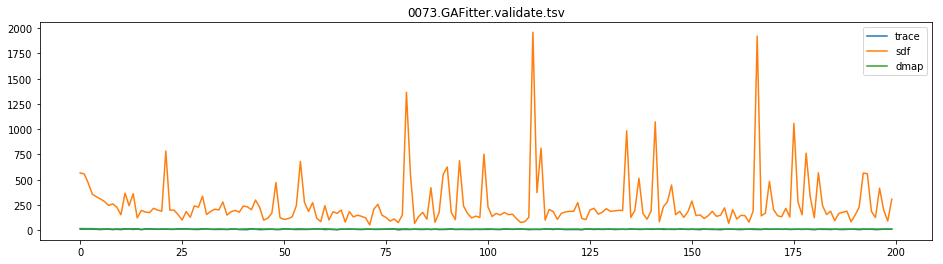

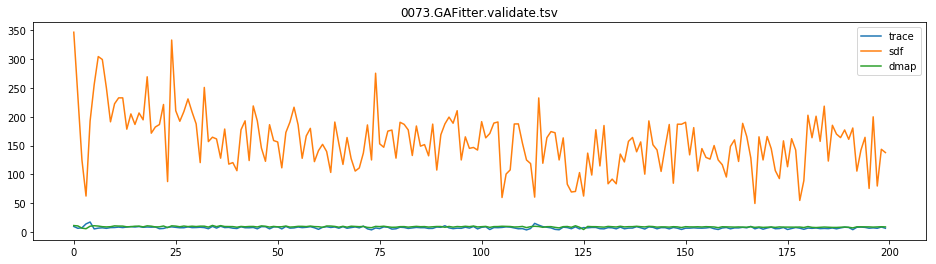

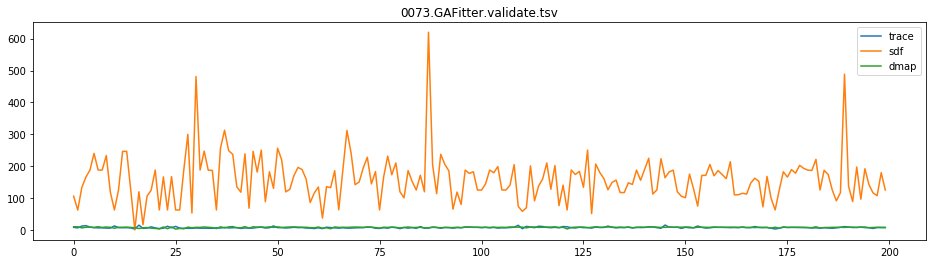

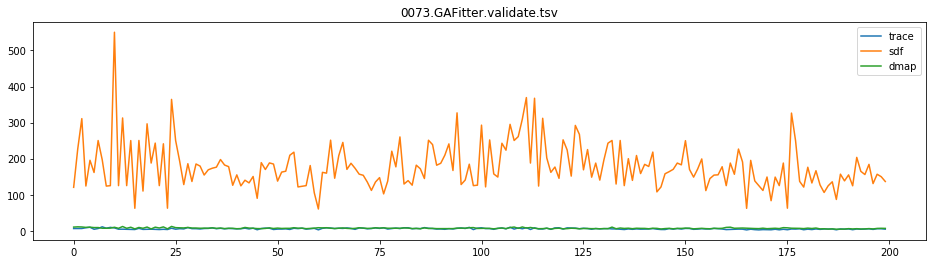

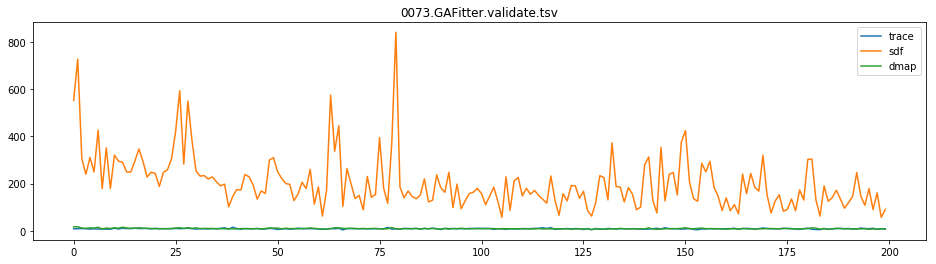

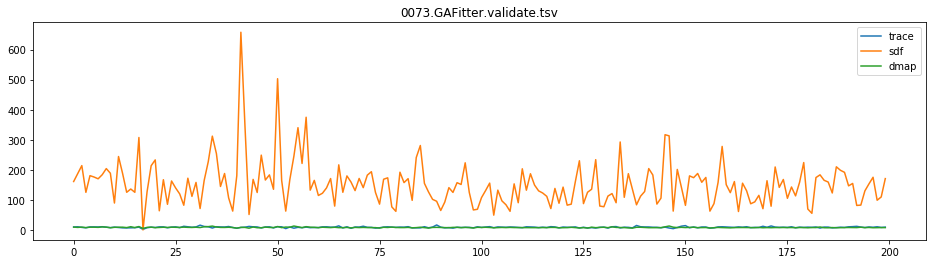

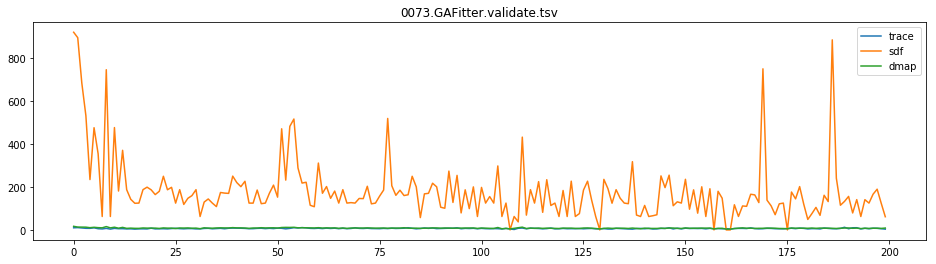

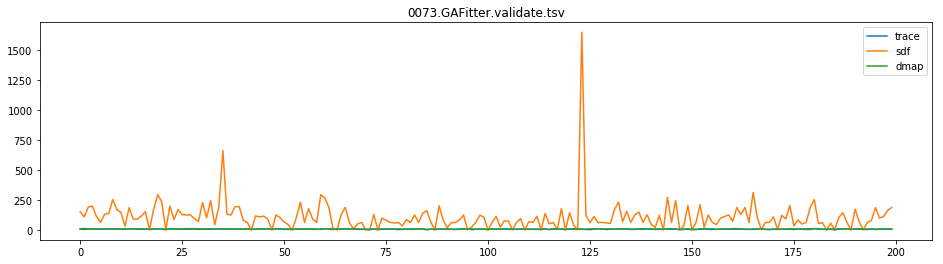

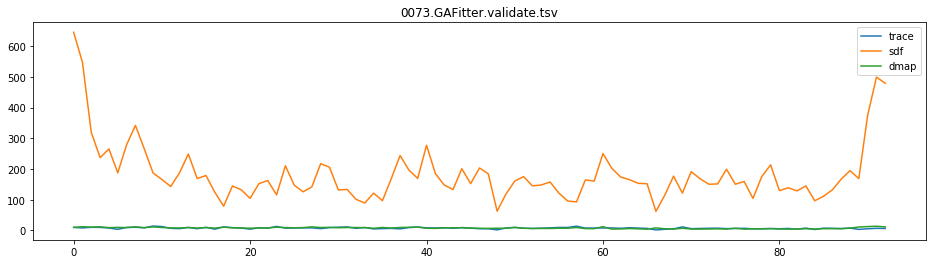

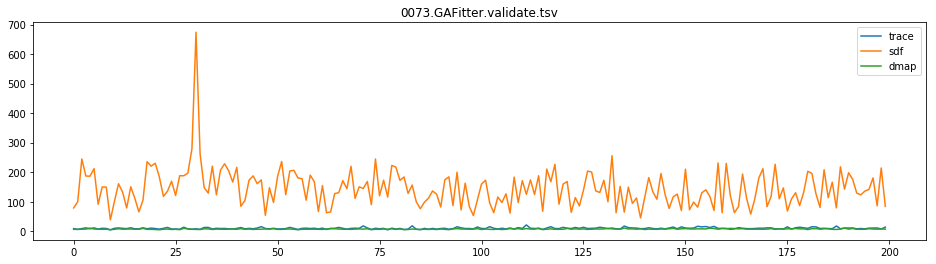

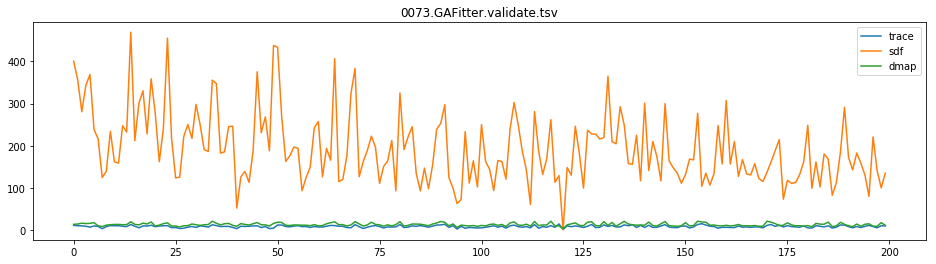

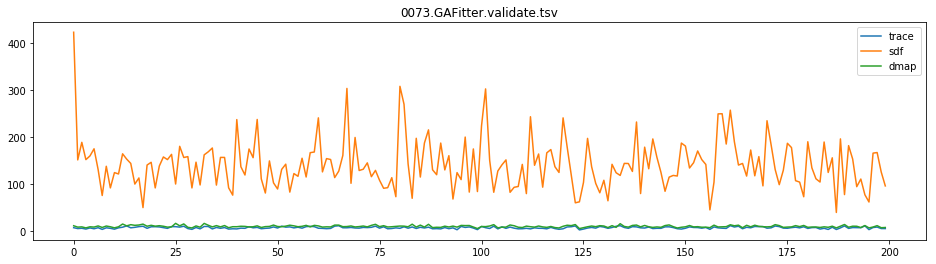

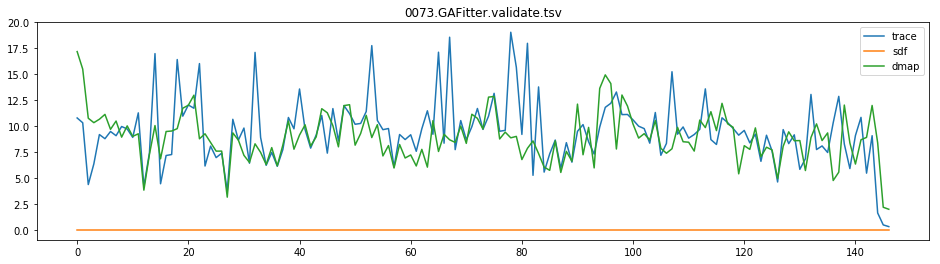

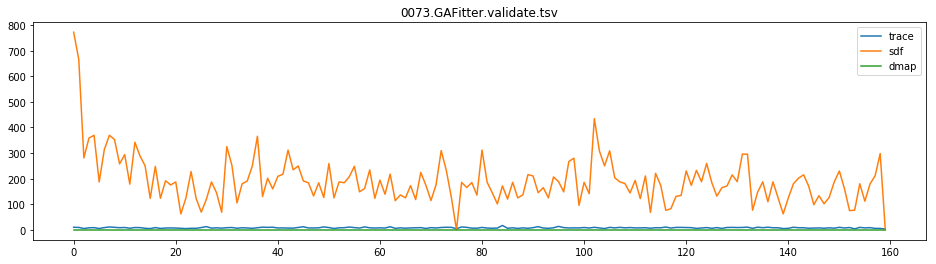

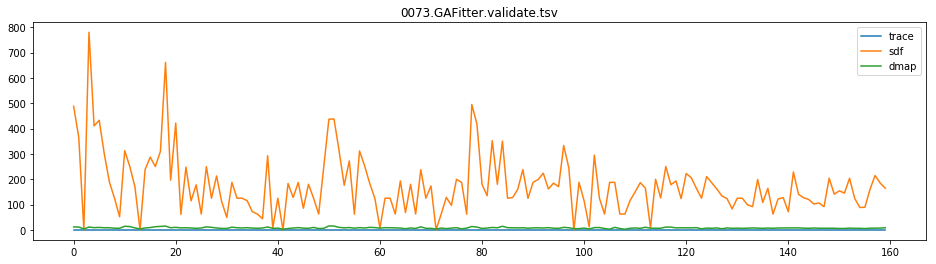

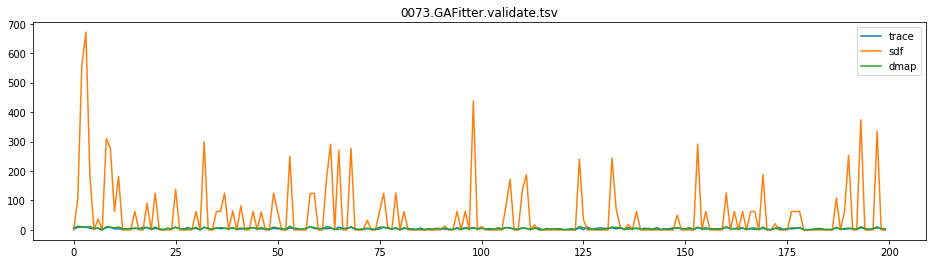

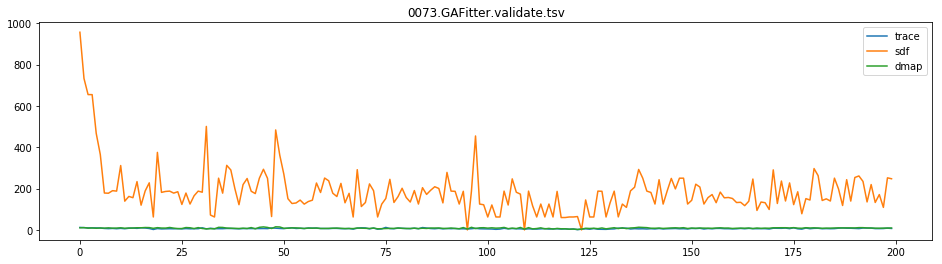

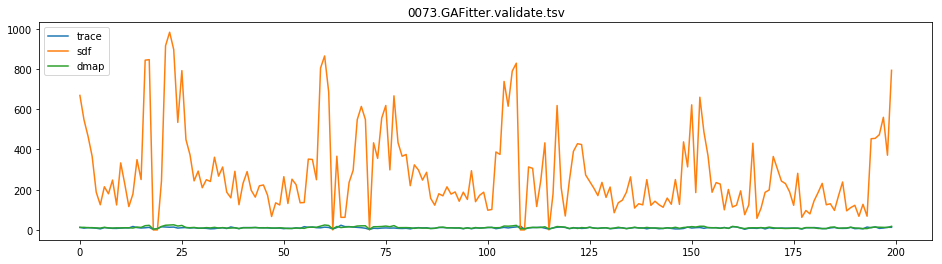

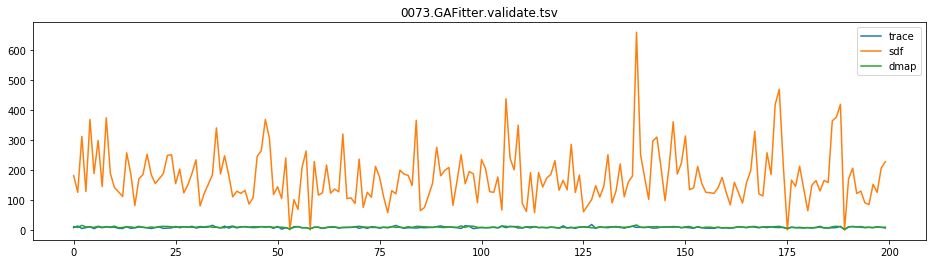

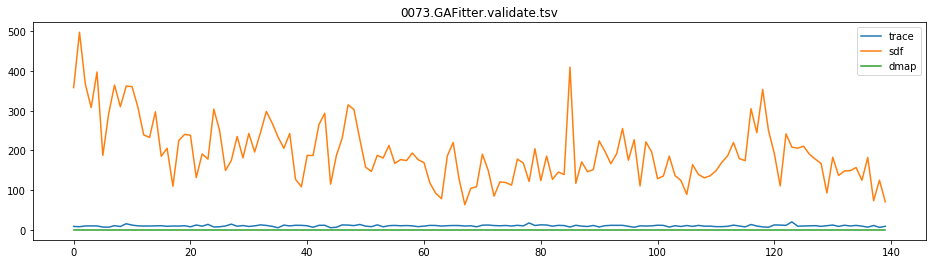

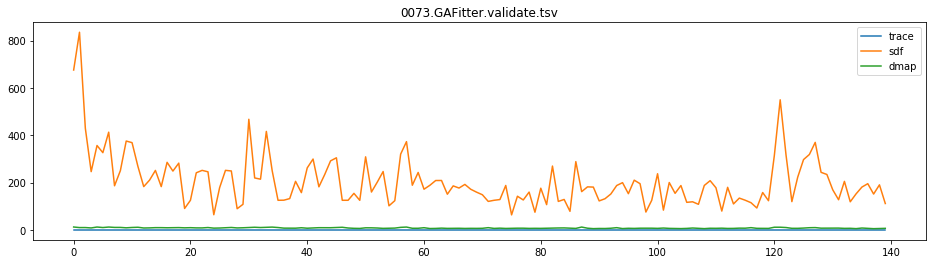

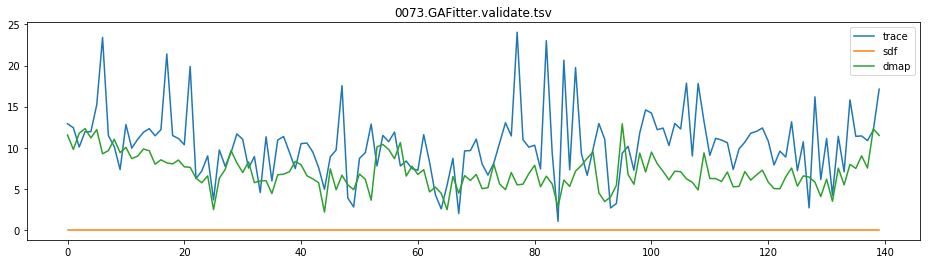

In [30]:
for data in allcost:
    plt.figure(figsize=(16,4))
    cost = np.median(data, axis=2).T
    plt.plot(cost[0], label='trace')
    plt.plot(cost[1], label='sdf')
    plt.plot(cost[2], label='dmap')
    plt.title(f)
    plt.legend()

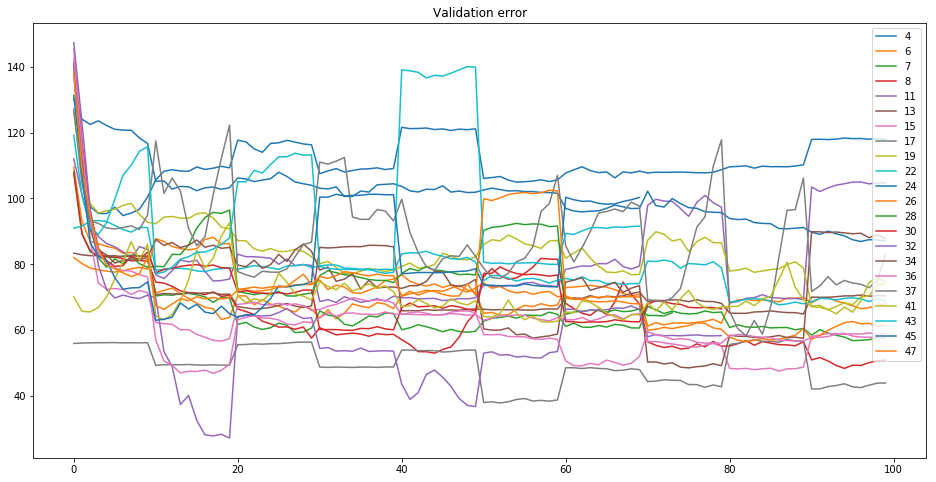

In [35]:
plt.figure(figsize=(16,8))
for data, i in zip(allvali, fileids):
    error = np.mean(data, axis=1).T
    plt.plot(error, label=i)
plt.title("Validation error")
plt.legend();

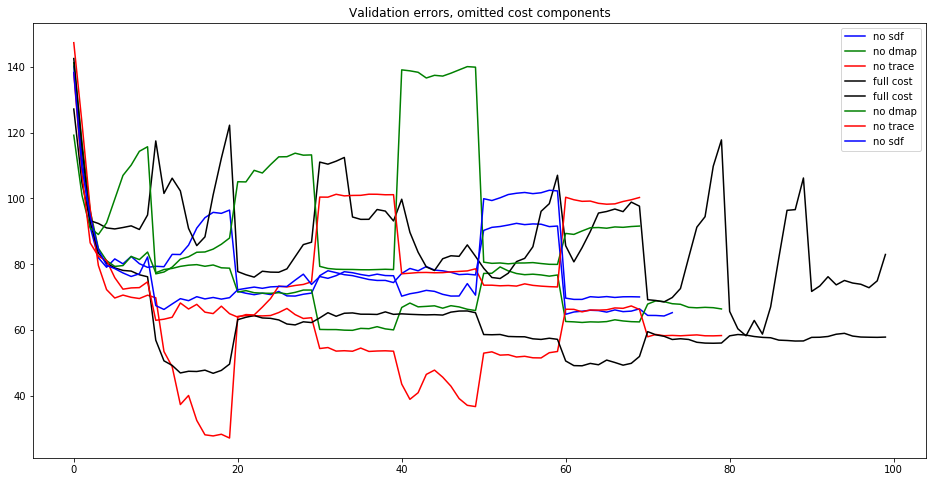

In [44]:
plt.figure(figsize=(16,8))
for data, i in zip(allvali, fileids):
    error = np.mean(data, axis=1).T
    if i in [36,37] :
        plt.plot(error, label='full cost', color='black')
    if i in [28,47] :
        plt.plot(error, label='no sdf', color='blue')
    if i in [30,43] :
        plt.plot(error, label='no dmap', color='green')
    if i in [32,45] :
        plt.plot(error, label='no trace', color='red')
plt.title("Validation errors, omitted cost components")
plt.legend();